# Aprendizaje Supervisado

## Ejercicio 5-1: Regresión

La regresión lineal es un modelo estadístico utilizado para predecir el valor de una variable dependiente o objetivo ($y$) a partir de una o más variables independientes o predictoras ($x$). Su objetivo es encontrar la relación lineal entre estas variables y se puede aplicar en dos formas principales:

1. Regresión Lineal Simple:

Modela la relación entre una variable independiente y una variable dependiente.

$$
y = \beta_0 + \beta_1 \cdot x_1+ \epsilon
$$
Donde:

* $beta_0$ es el intercepto (valor de y cuando x=0)
* $beta_1$ es la pendiente (cuánto cambia y por cada unidad adicional de x)
* ϵ es el término de error (captura las variaciones no explicadas por el modelo).


2. Regresión Lineal Múltiple:

Extiende la regresión lineal simple para modelar la relación entre varias variables independientes y una variable dependiente.

$$
y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \cdots + \beta_n \cdot x_n + \epsilon
$$

**Suposiciones de la Regresión Lineal:**

* **Linealidad**: La relación entre las variables independientes y la dependiente debe ser lineal.
* **Independencia**: Las observaciones deben ser independientes entre sí.

\
En este ejercicio entrenaremos de forma básica un Regresor lineal univariable para predecir la longitd del petalo de una flor de Iris partiendo de la anchura del petalo

Aclaración sobre los errores calculados:
- Coeficiente de Determinación R² (R cuadrado) evalúa lo bien que el modelo se ajusta a los datos (entre 0 y 1)
  
- Error Cuadratico Medio (MSE) es una métrica que te indica qué tan lejos están las predicciones de tu modelo de los valores reales en promedio. 

- Error Medio Absoluto (MAE) nos dice, en promedio, cuánto se desvía el modelo en cada predicción respecto a los valores reales.

- Raiz del Error Cuadrático Medio (RMSE) indica lo cerca o lejos que las predicciones estan de los valores reales. Comparar con respecto a la    
  orquilla de valores objetivo

MSE:Un error grande tiene un impacto mucho mayor en el MSE que un error pequeño\
MAE:Trata todos los errores de forma lineal\ 
RMSE bajo: en promedio, las predicciones están cercanas a los valores reales\
RMSE alto: en promedio, las predicciones están muy lejos de los valores reales\


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Creamos el DataFrame y añadimos etiquetas a las columnas
df = pd.read_csv('./data/iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# x, y: un atributo predictor y uno target, ambos numéricos
x = df[['petal_width']]
y = df['petal_length']



Text(0, 0.5, 'petal_length')

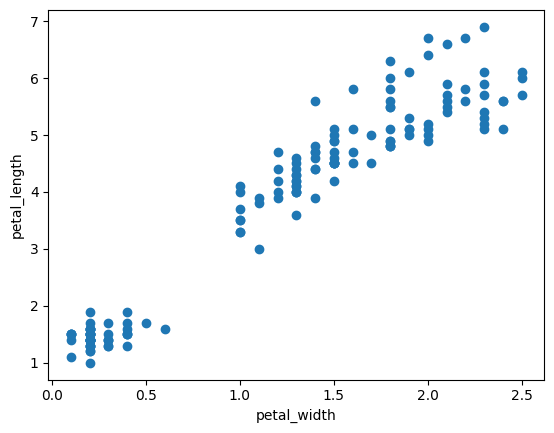

In [82]:
# Nube de puntos (scattereplot)

plt.scatter(x['petal_width'], y, label='Datos')
plt.xlabel('petal_width')
plt.ylabel('petal_length')

In [83]:
# Creación de un regresor lineal
lm = LinearRegression()

In [84]:
# Entrenamiento del regresor
#reg.fit(x, y)
lm.fit(x, y)

LinearRegression()

In [85]:
# Predicción para datos de entrenamiento
y_pred = lm.predict(x)

In [89]:
# Calculo de errores


print("Coef. de determinación R2= ",metrics.r2_score(y, y_pred))

print("Error Cuadrático Medio (MSE) para el modelo de regresión linear = ", metrics.mean_squared_error(y, y_pred))

print("Error Medio Absoluto (MAE):", metrics.mean_absolute_error(y, y_pred))

print("Raiz del Error Cuadrático Medio (RMSE):", np.sqrt(metrics.mean_squared_error(y,y_pred)))




Coef. de determinación R2=  0.9269012279220037
Error Cuadrático Medio (MSE) para el modelo de regresión linear =  0.22605246212121197
Error Medio Absoluto (MAE): 0.3678801092318533
Raiz del Error Cuadrático Medio (RMSE): 0.47544974720911565


C:\Users\HOME\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


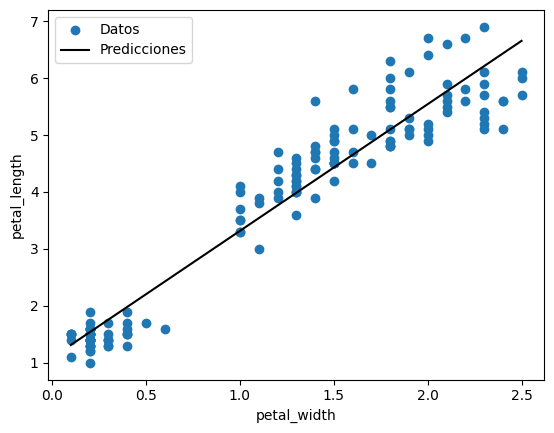

In [87]:
# Gráfica de modelo de regresión sobre scatterplot de datos

x_graf = np.arange(np.min(x['petal_width']), np.max(x['petal_width']), 1e-3)
y_graf = lm.predict(x_graf.reshape(-1, 1))

plt.scatter(x['petal_width'], y, label='Datos')
plt.plot(x_graf, y_graf, color='k', label='Predicciones')
plt.xlabel('petal_width')
plt.ylabel('petal_length')
plt.legend()

Ejercicio:

 ¿Como te plantearias poder entrenar el modelo de regresión lineal anterior para que, en lugar de devolver la longitud del petalo a partir de la anchura de cierto petalo, conteste con una frase que diga "No soy capaz de obtener la longitud el petalo de esta planta"

Ejercicio: 

¿Se puede establecer una relación lineal entre la anchura de sepalo y la longitud de petalo de las flores de Iris? En caso afirmativo entrena un Regresor Lineal para predecir valores (Haz uso de las representaciones gráficas que estimes necesario antes de contestar a la pregunta)